In [143]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from scipy.integrate import odeint

# Linearisation of R-P equation
$$
\omega^2  - j\omega \frac{4\mu_L}{\rho_L R_0^2} +  \frac{1}{\rho_L R_0^2} \left(
  ( \frac{2\sigma}{R_0} - {3kp_{G,0}}) \right)
  =
  - \frac{p_\infty}{\rho_L R_0^2 \epsilon_0} e^{-j\phi}
$$


$$
R(t) = R_0  -  R_0 \epsilon_0
    ~Re
      \left\{ e^{j ( \omega t + \phi)} \right\}
$$

$$
\phi = - arctan {
            \bigg( \frac{ \omega^2 - \omega_0^2}{ ( \omega \frac{4\mu_L}{\rho_L R_0^2}  )} \bigg)
                 } - \frac{\pi}{2}
$$

$$
\epsilon_0 = \frac{p_A}{\rho_L R_0^2}
  \frac{1}{\sqrt{\left(  (\omega^2 - \omega_0^2)^2 + (\omega \frac{4\mu_L}{\rho_L R_0^2} )^2        \right)}}
$$

## Non Dimensional numbers

(1) Acoustic pressure to ambient pressure ratio
$$
    p^* = \frac{p_A}{p_{\infty,0}}
$$
(2) Weber Number
$$
    w^* = \frac{p_{\infty,0} R_0}{2\sigma}
$$
(3) 
$$
 l^{*} = \frac{p_{\infty,0}}{\rho_L R_0^2 \omega^2}
$$
(4) Ratio of natural frequency to driving frequency ratio
$$
    \omega^* = \frac{\omega_0}{\omega} = \sqrt{l^* \left( 3k (1+\frac{1}{w^*})  - \frac{1}{w^*}\right) }
$$
(5) Viscous Damping coefficient
$$
    \zeta^* = \frac{\beta_{\mu}}{\omega} = \frac{2\mu_L}{\rho_L R_0^2 \omega}
$$
Don't confuse with
$$
    \zeta = \frac{\beta_{\mu}}{\omega_0} = \frac{2\mu_L}{\rho_L R_0^2 \omega_0} = \frac{\zeta^*}{\omega^*}
$$
## Bubble response
which gives for an external pressure field with an acoustic pressure pertubration
$$
    p_{\infty}(t) = p_{\infty,0} \left( 1 + p^* Re \{ e^{j\omega t}\} \right)
$$
The bubble responds as
$$
R(t) = R_0  -  R_0 \epsilon_0
    ~Re
      \left\{ e^{j ( \omega t + \phi)} \right\}
$$
where 
$$
\phi = - arctan {
            \bigg( \frac{ 1 - {\omega^*}^2 }{ ( 2\zeta^* \omega^* )} \bigg)
                 } - \frac{\pi}{2}
$$
and 
$$
\epsilon_0 = 
  \frac{p^* l^*}{\sqrt{\left(  {(1 - {\omega^*}^2)}^2 + { ( 2\zeta^* \omega^* )}^2        \right)}}
$$

### Transient Effect
$$
R(t) = R_0  
    - R_0 \epsilon_0 ~ Re \left\{ e^{j ( \omega t + \phi)} \right\} 
    + R_0 \epsilon_0 e^{\zeta \omega_0 t} ~ Re \left\{ e^{j ( \omega_d t + \phi)} \right\}
$$

$$
R^*(t^*) = 1  
    -  \epsilon_0 ~ Re \left\{ e^{j ( t^* + \phi)} \right\} 
    +  \epsilon_0 e^{-\zeta^* t^*} ~ Re \left\{ e^{j \left(t^*  \sqrt{{\omega^*}^2 - {\zeta^*}^2 } + \phi \right) } \right\}
$$
which gives $R^*(t^* = 0) =  1$

In [144]:
#Liquid properties
rho = 1e3
mu = 8.9e-4
#mu = 8.9e-8
sigma=0.072

#Ambient COnditions
p_atm = 1e5

#Polytropic coeff
gamma=1.33

Fixed these parameters fixed for air-water at ambient

$$p_{\infty,0} = 1\times 10^5 Pa$$,

$$\rho_L = 1\times 10^{3} kgm^{-3}$$,

$$\mu_L=8.9\times 10^{-4} Ns/m^{2}$$,

$$\sigma = 0.072 N/m$$,

$$\gamma = 1.33$$

These parameters are chosen

$$R_0 = 2\times 10^{-6} m $$

$$\frac{\omega_0}{\omega} = 1.2 $$

In [145]:
#initial Condition
R_0 = 2e-6
u_0 = 0

#frequency ratio
omegastar = 1.2

#Polytropic coeff
k=gamma

#acoustic pressure ratio
pstar = 0.01

In [146]:
#NOn dimensional numbers
def parameters(omegastar, R_0, k, pstar):
    #weber number
    wstar = p_atm/(2*sigma/R_0)
    #Natural Frequency
    omega0 = np.sqrt(p_atm/(rho*R_0**2))*np.sqrt( 3*k*(1+1/wstar) - 1/wstar );
    omega = omega0/omegastar
    lstar = p_atm/(rho* R_0**2 * omega**2);
    zetastar = 2*mu/(rho* R_0**2 * omega);
    return [pstar, wstar, lstar, omegastar, zetastar, omega0]    

In [147]:
#Amplitude and phase
def cosineparameters(pstar, wstar, lstar, omegastar, zetastar):
    phi = -np.arctan2(1-omegastar**2, 2*zetastar)-0.5*np.pi
    eps = pstar*lstar/np.sqrt( ( 1-omegastar**2 )**2 +  ( 2*zetastar )**2);
    return [phi, eps]

In [148]:
def cosine(A, PHI, OMEGA, T):
    return A*np.cos(OMEGA*T+PHI)

In [149]:
def linear_response(tstar_space):
    #tstar = omega t;
    #assume non-dim parameters are set
    phi,eps = cosineparameters(pstar, wstar, lstar, omegastar, zetastar);
    _1 = np.ones(len(tstar_space));
    Rstar_space = _1 - cosine(eps, phi, 1, tstar_space)
    Ustar_space = -cosine(eps, phi+0.5*np.pi, 1, tstar_space)
    return (Rstar_space, Ustar_space)

def linear_response_with_transient(tstar_space):
    #tstar = omega t;
    #assume non-dim parameters are set
    phi,eps = cosineparameters(pstar, wstar, lstar, omegastar, zetastar);
    _1 = np.ones(len(tstar_space));
    Rstar_space = _1 - cosine(eps, phi, 1, tstar_space) 
    #Add transient
    Rstar_space +=  np.exp(-zetastar*tstar_space)*cosine(eps, phi, np.sqrt(omegastar**2 - zetastar**2), tstar_space)
    Ustar_space = -cosine(eps, phi+0.5*np.pi, 1, tstar_space)
    return (Rstar_space, Ustar_space)

In [150]:
#check the non-dim numbers
(pstar, wstar, lstar, omegastar, zetastar, omega0) = parameters (omegastar, R_0, gamma, pstar) 
parameters (omegastar, R_0, gamma, pstar) 

[0.01,
 1.3888888888888888,
 0.23442078530963067,
 1.2,
 0.043091148051979125,
 12392336.341465238]

In [151]:
(phi, eps) = cosineparameters(pstar, wstar, lstar, omegastar, zetastar)
cosineparameters(pstar, wstar, lstar, omegastar, zetastar)

[-0.19342016750339086, 0.005228396333483668]

## Bubble response using Linear Response analysis

(plot $p_\infty(t^*)$ vs $t^*$ and $R^*(t^*)$ vs $t^*$ )

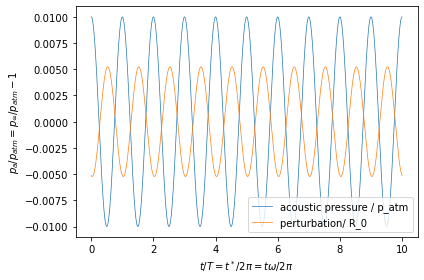

In [152]:
# plot p_\infty(t^*) vs t^* and R^*(t^*) vs t^* 
Ncycles =  10
tstar_space = np.linspace(0, 2*np.pi*Ncycles, 10000, endpoint = True)  # 10 cycles
psample = cosine(pstar, 0., 1, tstar_space)
R, U = linear_response(tstar_space)
fig, ax1 = plt.subplots()

ax1.set_xlabel(r"$t/T = t^* /2 \pi  = t \omega/2\pi $")
ax1.set_ylabel(r"$p_a/p_{atm} =  p_{\infty}/p_{atm} - 1.$")
ax1.plot(tstar_sample/2/np.pi, psample, linewidth = 0.7, label = "acoustic pressure / p_atm")
ax1.plot(tstar_sample/2/np.pi, R-1., linewidth = 0.7, label = "perturbation/ R_0")

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

# Rayleigh-Plesset Equation
$$
    \frac{1}{\rho_L} {(p_B(t) - p_{\infty}(t))} =  R\frac{d^2 R}{dt^2}
             + \frac{3}{2} (\frac{dR}{dt})^2 + \frac{4 \nu_L}{R} \frac{dR}{dt} + \frac{2\sigma}{\rho_L R}
$$
## (Some more) Non dimensional numbers
(6) Non-dim time
    $$
        t^* = {t}{\omega}
    $$
(7) Non-dim Radius
    $$
       R^*(t^*) =  \frac{R(t^*)}{R_0}
    $$
(8) Non-dim Interface velocity
    $$
       U^{*} =  \frac{dR^*}{dt} = \frac{1}{R_0 \omega} \frac{dR}{dt}
    $$
 We alse have
    $$
       \frac{U^{*}}{dt^*} =  \frac{1}{R_0 \omega^2} \frac{d^2 R}{dt^2}
    $$
    
## R-P (Non-dimensionalised)

$$
    R^*\frac{dU^*}{dt^*} + \frac{3}{2} {U^*}^2 + 2\zeta^* \omega^* \frac{U^*}{R^*} + \frac{l^*}{w^*} \frac{1}{R^*} =
    l^* (1+\frac{1}{w^*}) (\frac{1}{R^*})^{3k} - l^* (1+p^* Re\{ e^{j t^*}\} )
$$
which gives

$$
\frac{d}{dt^*} 
\begin{bmatrix} R^* \\ U^* \end{bmatrix} =
\begin{bmatrix} U^* \\ \frac{1}{R^* }\left( 
    l^* (1+\frac{1}{w^*}) \left( \frac{1}{R^*}\right)^{3k} -l^* \left( 1 + p^* cos(t^*) \right) - 
    \frac{3}{2} {U^*}^2 - 2\zeta^* \omega^* \frac{U^*}{R^*} - \frac{l^*}{w^*} \frac{1}{R^*}
\right)
\end{bmatrix}
$$

In the above equation
$$ \frac{1}{\rho_L R_0^2 \omega^2} p_G(t) = l^* (1+\frac{1}{w^*}) \left( \frac{1}{R^*}\right)^{3k}$$
$$ \frac{1}{\rho_L R_0^2 \omega^2} p_\infty (t) = l^* \left( 1 + p^*  cos(t^*)  \right)$$


## Integration of R-P (Non-dim)

In [153]:
def pstar_infty (tstar):
    return lstar * (1 + pstar*np.cos(tstar))

#def dpinfty_dt(t):
#    return (-p_a*(omega*np.cos(omega*t) + (3*(t-t0)/t0**2)*np.sin(omega*t))*np.exp(-1.5*(t-t0)**2/(t0**2)));

#partial pressure of air as a function of R
def pstar_gas(Rstar, k):
    return lstar*(1+1/wstar)*np.power(Rstar, -3*k)

#d/dt (x) = equation(x,t)
def RP(x, tstar):
    (Rstar,Ustar) = x;
    dfdt = ( pstar_gas(Rstar, k) - pstar_infty(tstar) - 1.5*Ustar**2 
                     - 2*zetastar*omegastar*Ustar/Rstar-lstar/(wstar*Rstar) )/Rstar
    return (Ustar, dfdt)

def RP_response(tstar_space):
    R_RP = odeint(RP, [1, 0], tstar_space)
    Ustar_space = R_RP[:,1]
    Rstar_space = R_RP[:,0]
    return Rstar_space, Ustar_space

## Compare bubble response (RP vs Linear Stability Analaysis)

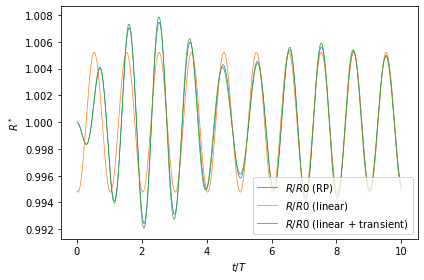

In [154]:
Ncycles =  10
tstar_space = np.linspace(0, 2*np.pi*Ncycles, 10000, endpoint = True)  # 10 cycles

fig, ax1 = plt.subplots()
ax1.set_xlabel(r"$t/T$")
ax1.set_ylabel("$R^*$")

R, U = RP_response(tstar_space)
ax1.plot(tstar_space/(2*np.pi), R, linewidth = 0.7, label = r"$R/R0$ (RP)")
R, U = linear_response(tstar_space)
ax1.plot(tstar_space/(2*np.pi), R, linewidth = 0.7, label = r"$R/R0$ (linear)")
R, U = linear_response_with_transient(tstar_space)
ax1.plot(tstar_space/(2*np.pi), R, linewidth = 0.7, label = r"$R/R0$ (linear + transient)")

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()


## Integration of R-P (Original)

In [155]:
def p_infty (t):
    p_it = p_atm * ( 1 +  pstar * np.cos(omega0*t/omegastar) )
    return p_it

#partial pressure of air as a function of R
def p_gas(R, k):
    p_g = p_atm*(1+1/wstar)*np.power(R_0/R, 3*k);
    return p_g

#d/dt (x) = equation(x,t)
def RPdim(x, t):
    (R,u) = x;
    udot = (p_gas(R, k) - p_infty(t)-2*sigma/R-4*mu*u/R)/(R*rho)-3*u**2/(2*R)
    return (u, udot)


def RPdim_response(R_0, U_0, t_space):
    R_RP = odeint(RPdim, [R_0, U_0], t_space)
    U_space = R_RP[:,1]
    R_space = R_RP[:,0]
    return R_space, U_space

## Compare bubble response (RP vs Linear Stability Analaysis)

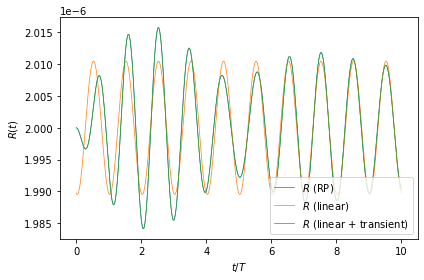

In [156]:
Ncycles =  10
tstar_space = np.linspace(0, 2*np.pi*Ncycles, 10000, endpoint = True)  # 10 cycles

fig, ax1 = plt.subplots()
ax1.set_xlabel(r"$t/T$")
ax1.set_ylabel("$R(t)$")

t_space = tstar_space/(omega0/omegastar)
R, U = RPdim_response(R_0, u_0, t_space)
ax1.plot(tstar_space/(2*np.pi), R, linewidth = 0.7, label = r"$R$ (RP)")
R, U = linear_response(tstar_space)
ax1.plot(tstar_space/(2*np.pi), R*R_0, linewidth = 0.7, label = r"$R$ (linear)")
R, U = linear_response_with_transient(tstar_space)
ax1.plot(tstar_space/(2*np.pi), R*R_0, linewidth = 0.7, label = r"$R$ (linear + transient)")

ax1.legend(loc = "lower right")

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()


## Frequency response (Linear approximation)

Amplitude of  (non-dimensionlised) radial perturbation is given by
$$
\epsilon_0 = 
  \frac{p^* l^*}{\sqrt{\left(  {(1 - {\omega^*}^2)}^2 + { ( 2\zeta^* )}^2        \right)}}
$$
And the maximum happens for the resonance frequency 
$$
    \omega_R = \omega_0 \sqrt{ 1 - 2{\zeta}^2 }    \quad\text{where}\quad  \zeta = \frac{\zeta^*}{\omega^*} 
    =  \frac{2\mu_L}{\rho_L R_0^2 \omega_0}
$$
and $max{\epsilon}$ is 
$$
\epsilon_0 \bigg|_{\omega = \omega_R} =
   \frac{p_A}{4\mu} \frac{1}{\sqrt{\omega_p^2
  + \frac{1}{4} \left( \frac{4\mu}{\rho_L R_0^2}  \right)^2}}
  = \frac{p_A}{4\mu} \frac{1}{\sqrt{\omega_0^2
  -  \frac{1}{4} \left( \frac{4\mu}{\rho_L R_0^2}  \right)^2}}
$$

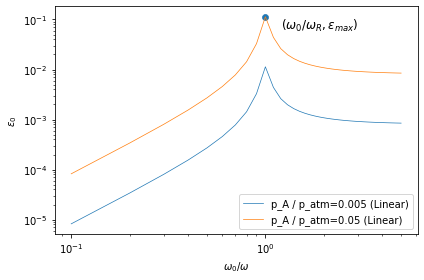

In [165]:
fig, ax1 = plt.subplots()

ax1.set_xlabel(r"$\omega_0/\omega$")
ax1.set_ylabel(r"$\epsilon_0$")



def init_parametric_space(omega_star_vector, p_star_vector):
    for i in range(len(p_star_vector)):
        pstar = p_star_vector[i]
        #check the non-dim numbers
        eps_vector = [];
        for j in range(len(omega_star_vector)):
            omegastar = omega_star_vector[j]
            params = parameters (omegastar, R_0, gamma, pstar);
            (pstar, wstar, lstar, omegastar, zetastar, omega0) = params;
            phi, eps = cosineparameters(pstar, wstar, lstar, omegastar, zetastar);
            eps_vector.append(eps)         
        _label = "p_A / p_atm="+str(pstar)+" (Linear)"
        ax1.plot(omega_star_vector, eps_vector, linewidth = 0.7, label=_label)


omegastar_space=0.1*np.ones(50)+0.1*np.array(range(50))
pstar_space=[0.005, 0.05]

init_parametric_space(omegastar_space, pstar_space)

#Resonance Frequency
omegaR = omega0*np.sqrt(1-2* (2*mu/(rho* R_0**2 * omega0))**2 )
omegaRstar = omega0/omegaR;

#Resonance amplitude.(both expr are same)
epsmax = 0.05*p_atm/(4*mu*np.sqrt(omega0**2 - 0.25*(4*mu/rho/R_0**2)**2 ))
epsmax = 0.05*p_atm/(4*mu*np.sqrt(omegaR**2 + 0.25*(4*mu/rho/R_0**2)**2 ))

plt.text(omegastar,epsmax, r'($\omega_0/\omega_R, \epsilon_{max}$)',ha='left', va='top', fontsize=12)
ax1.scatter([omegaRstar], [epsmax], linewidth = 0.7)


ax1.legend(loc = "lower right")
ax1.set_xscale('log')
ax1.set_yscale('log')


fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()


### Compare with RP (Excluding the transient part)



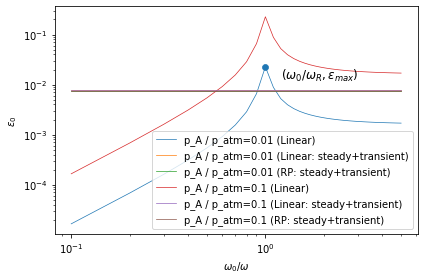

In [166]:
fig, ax1 = plt.subplots()

ax1.set_xlabel(r"$\omega_0/\omega$")
ax1.set_ylabel(r"$\epsilon_0$")



def init_parametric_space(omega_star_vector, p_star_vector):
    for i in range(len(p_star_vector)):
        pstar = p_star_vector[i]
        #check the non-dim numbers
        eps_vector = [];
        epst_vector = [];
        epsRP_vector = [];
        for j in range(len(omega_star_vector)):
            omegastar = omega_star_vector[j]
            params = parameters (omegastar, R_0, gamma, pstar);
            (pstar, wstar, lstar, omegastar, zetastar, omega0) = params;
            phi, eps = cosineparameters(pstar, wstar, lstar, omegastar, zetastar);
            eps_vector.append(eps)         
            R, U = linear_response_with_transient(tstar_space)
            R -=  1.
            epst_vector.append(max(R))
            R, U = RP_response(tstar_space)
            R -=  1.
            epsRP_vector.append(max(R))
        _label = "p_A / p_atm="+str(pstar)+" (Linear)"
        ax1.plot(omega_star_vector, eps_vector, linewidth = 0.7, label=_label)
        _label = "p_A / p_atm="+str(pstar)+" (Linear: steady+transient)"
        ax1.plot(omega_star_vector, epst_vector, linewidth = 0.7, label=_label)
        _label = "p_A / p_atm="+str(pstar)+" (RP: steady+transient)"
        ax1.plot(omega_star_vector, epsRP_vector, linewidth = 0.7, label=_label)


omegastar_space=0.1*np.ones(50)+0.1*np.array(range(50))
pstar_space=[0.01, 0.1]

init_parametric_space(omegastar_space, pstar_space)

#Resonance Frequency
omegaR = omega0*np.sqrt(1-2* (2*mu/(rho* R_0**2 * omega0))**2 )
omegaRstar = omega0/omegaR;

#Resonance amplitude.(both expr are same)
epsmax = 0.01*p_atm/(4*mu*np.sqrt(omega0**2 - 0.25*(4*mu/rho/R_0**2)**2 ))
epsmax = 0.01*p_atm/(4*mu*np.sqrt(omegaR**2 + 0.25*(4*mu/rho/R_0**2)**2 ))

plt.text(omegastar,epsmax, r'($\omega_0/\omega_R, \epsilon_{max}$)',ha='left', va='top', fontsize=12)
ax1.scatter([omegaRstar], [epsmax], linewidth = 0.7)


ax1.legend(loc = "lower right")
ax1.set_xscale('log')
ax1.set_yscale('log')


fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()


## Two limits ($\omega_0/\omega <<1$) and   ($\omega_0/\omega >> 1$)

Amplitude of  (non-dimensionlised) radial perturbation is given by
$$
\epsilon_0 = 
  \frac{p^* l^*}{\sqrt{\left(  {(1 - {\omega^*}^2)}^2 + { ( 2\zeta^* )}^2        \right)}}
$$

### Case 1:  $\omega^* <<1$ or $\omega_0 << \omega$
$$
\epsilon_0 \bigg|_{\omega^* <<1} =  
  {p^* l^*} = \frac{p_A}{\rho_L R_0^2 \omega^2}
$$

### Case 2:  $\omega^* >> 1$ or $\omega_0 >> \omega$
$$
\epsilon_0 \bigg|_{\omega^* >> 1} = 
  \frac{p^* l^*}{{\omega^*}^2} =  \frac{p_A}{\rho_L R_0^2 \omega_0^2}
$$



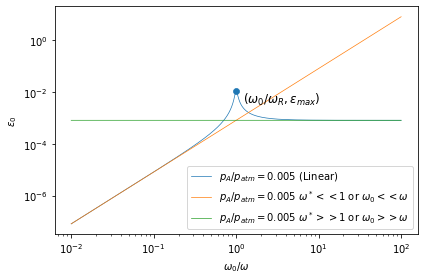

In [158]:
fig, ax1 = plt.subplots()

ax1.set_xlabel(r"$\omega_0/\omega$")
ax1.set_ylabel(r"$\epsilon_0$")



def init_parametric_space(omega_star_vector, p_star_vector):
    for i in range(len(p_star_vector)):
        pstar = p_star_vector[i]
        #check the non-dim numbers
        eps_vector = [];
        eps_vector_RP = [];
        for j in range(len(omega_star_vector)):
            omegastar = omega_star_vector[j]
            params = parameters (omegastar, R_0, gamma, pstar);
            (pstar, wstar, lstar, omegastar, zetastar, omega0) = params;
            phi, eps = cosineparameters(pstar, wstar, lstar, omegastar, zetastar);
            eps_vector.append(eps)         
        _label = r"$p_A / p_{atm}=$"+str(pstar)+" (Linear)"
        ax1.plot(omega_star_vector, eps_vector, linewidth = 0.7, label=_label)
        
#limit 1 (omega0 << omega)
def init_parametric_space_case1(omega_star_vector, p_star_vector):
    for i in range(len(p_star_vector)):
        pstar = p_star_vector[i]
        #check the non-dim numbers
        eps_vector = [];
        eps_vector_RP = [];
        for j in range(len(omega_star_vector)):
            omegastar = omega_star_vector[j]
            params = parameters (omegastar, R_0, gamma, pstar);
            (pstar, wstar, lstar, omegastar, zetastar, omega0) = params;
            eps_vector.append(pstar*lstar)         
        _label = r"$p_A / p_{atm}=$"+str(pstar)+r" $\omega^* <<1$ or $\omega_0 << \omega$"
        ax1.plot(omega_star_vector, eps_vector, linewidth = 0.7, label=_label)
        
#limit 1 (omega0 >> omega)
def init_parametric_space_case2(omega_star_vector, p_star_vector):
    for i in range(len(p_star_vector)):
        pstar = p_star_vector[i]
        #check the non-dim numbers
        eps_vector = [];
        eps_vector_RP = [];
        for j in range(len(omega_star_vector)):
            omegastar = omega_star_vector[j]
            params = parameters (omegastar, R_0, gamma, pstar);
            (pstar, wstar, lstar, omegastar, zetastar, omega0) = params;
            eps_vector.append(pstar*lstar/omegastar**2)         
        _label = r"$p_A / p_{atm}=$"+str(pstar)+r" $\omega^* >> 1$ or $\omega_0 >> \omega$"
        ax1.plot(omega_star_vector, eps_vector, linewidth = 0.7, label=_label)


#omegastar_space=0.1*np.ones(50)+0.1*np.array(range(50))
omegastar_space=10**np.linspace(-2, 2, 10000, endpoint=True)
pstar_space=[0.005]

init_parametric_space(omegastar_space, pstar_space)
init_parametric_space_case1(omegastar_space, pstar_space)
init_parametric_space_case2(omegastar_space, pstar_space)

#Resonance Frequency
omegaR = omega0*np.sqrt(1-2* (2*mu/(rho* R_0**2 * omega0))**2 )
omegaRstar = omega0/omegaR;

#Resonance amplitude.(both expr are same)
epsmax = 0.005*p_atm/(4*mu*np.sqrt(omega0**2 - 0.25*(4*mu/rho/R_0**2)**2 ))
epsmax = 0.005*p_atm/(4*mu*np.sqrt(omegaR**2 + 0.25*(4*mu/rho/R_0**2)**2 ))

plt.text(omegastar,epsmax, r'($\omega_0/\omega_R, \epsilon_{max}$)',ha='left', va='top', fontsize=12)
ax1.scatter([omegaRstar], [epsmax], linewidth = 0.7)


ax1.legend(loc = "lower right")
ax1.set_xscale('log')
ax1.set_yscale('log')


fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()


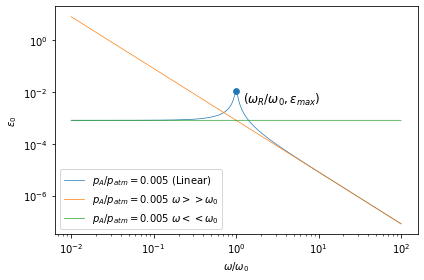

In [159]:
fig, ax1 = plt.subplots()

ax1.set_xlabel(r"$\omega/\omega_0$")
ax1.set_ylabel(r"$\epsilon_0$")



def init_parametric_space(omega_star_vector, p_star_vector):
    for i in range(len(p_star_vector)):
        pstar = p_star_vector[i]
        #check the non-dim numbers
        eps_vector = [];
        eps_vector_RP = [];
        for j in range(len(omega_star_vector)):
            omegastar = omega_star_vector[j]
            params = parameters (omegastar, R_0, gamma, pstar);
            (pstar, wstar, lstar, omegastar, zetastar, omega0) = params;
            phi, eps = cosineparameters(pstar, wstar, lstar, omegastar, zetastar);
            eps_vector.append(eps)         
        _label = r"$p_A / p_{atm}=$"+str(pstar)+" (Linear)"
        ax1.plot(1./omega_star_vector, eps_vector, linewidth = 0.7, label=_label)
        
#limit 1 (omega0 << omega)
def init_parametric_space_case1(omega_star_vector, p_star_vector):
    for i in range(len(p_star_vector)):
        pstar = p_star_vector[i]
        #check the non-dim numbers
        eps_vector = [];
        eps_vector_RP = [];
        for j in range(len(omega_star_vector)):
            omegastar = omega_star_vector[j]
            params = parameters (omegastar, R_0, gamma, pstar);
            (pstar, wstar, lstar, omegastar, zetastar, omega0) = params;
            eps_vector.append(pstar*lstar)         
        _label = r"$p_A / p_{atm}=$"+str(pstar)+r" $\omega >> \omega_0$"
        ax1.plot(1./omega_star_vector, eps_vector, linewidth = 0.7, label=_label)
        
#limit 1 (omega0 >> omega)
def init_parametric_space_case2(omega_star_vector, p_star_vector):
    for i in range(len(p_star_vector)):
        pstar = p_star_vector[i]
        #check the non-dim numbers
        eps_vector = [];
        eps_vector_RP = [];
        for j in range(len(omega_star_vector)):
            omegastar = omega_star_vector[j]
            params = parameters (omegastar, R_0, gamma, pstar);
            (pstar, wstar, lstar, omegastar, zetastar, omega0) = params;
            eps_vector.append(pstar*lstar/omegastar**2)         
        _label = r"$p_A / p_{atm}=$"+str(pstar)+r" $\omega << \omega_0$"
        ax1.plot(1./omega_star_vector, eps_vector, linewidth = 0.7, label=_label)


#omegastar_space=0.1*np.ones(50)+0.1*np.array(range(50))
omegastar_space=10**np.linspace(-2, 2, 10000, endpoint=True)
pstar_space=[0.005]

init_parametric_space(omegastar_space, pstar_space)
init_parametric_space_case1(omegastar_space, pstar_space)
init_parametric_space_case2(omegastar_space, pstar_space)

#Resonance Frequency
omegaR = omega0*np.sqrt(1-2* (2*mu/(rho* R_0**2 * omega0))**2 )
omegaRstar = omega0/omegaR;

#Resonance amplitude.(both expr are same)
epsmax = 0.005*p_atm/(4*mu*np.sqrt(omega0**2 - 0.25*(4*mu/rho/R_0**2)**2 ))
epsmax = 0.005*p_atm/(4*mu*np.sqrt(omegaR**2 + 0.25*(4*mu/rho/R_0**2)**2 ))

plt.text(omegastar,epsmax, r'($\omega_R/\omega_0, \epsilon_{max}$)',ha='left', va='top', fontsize=12)
ax1.scatter([omegaRstar], [epsmax], linewidth = 0.7)


ax1.legend(loc = "lower left")
ax1.set_xscale('log')
ax1.set_yscale('log')


fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()


## Compare RP vs Linear Model

### $p^* << 1$